In [32]:
import pandas as pd
import numpy as np
import math
import statistics as st
from datetime import timedelta
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("../datasets/indian_stock_indices/Stock_Indices.xlsx")

In [3]:
df.head()

,Date,SENSEX,NIFTY50,NIFTY_CONSUMPTION
0,2014-01-01,21140.48,6323.80,2590.000000
1,2014-01-02,20888.33,6301.25,2544.649902
2,2014-01-03,20851.33,6194.55,2546.949951
3,2014-01-06,20787.30,6220.85,2544.649902
4,2014-01-07,20693.24,6203.90,2543.399902


In [4]:
ONE_DAY = timedelta(days=1)

In [5]:
total_size = 2469

train_size = 1728 # Training data of 7 years (01-01-2014 to 31-12-2020)
test_size = 741 # Testing data of 3 years (01-01-2021 to 31-12-2023)

### Calculating weekly returns and volatilities (over 1 week) for SENSEX, NIFTY50 and NIFTY Consumption

In [18]:
N = train_size

sensex_volatilities = []
nifty_volatilities = []
niftyc_volatilities = []

sensex_returns = []
nifty_returns = []
niftyc_returns = []

i = 0
j = 0

while i < N:
    sensex_period_returns = []
    nifty_period_returns = []
    niftyc_period_returns = []
    
    period_size = 1
    
    while ((j + 1) < N) and ((df['Date'][j + 1] - df['Date'][j]) == timedelta(days=1)):
        period_size += 1
#         print(df['SENSEX'][j])

        sensex_ret = math.log(df['SENSEX'][j + 1] / df['SENSEX'][j])
        nifty_ret = math.log(df['NIFTY50'][j + 1] / df['NIFTY50'][j])
        niftyc_ret = math.log(df['NIFTY_CONSUMPTION'][j + 1] / df['NIFTY_CONSUMPTION'][j])
        
        sensex_period_returns.append(sensex_ret)
        nifty_period_returns.append(nifty_ret)
        niftyc_period_returns.append(niftyc_ret)
        
        j += 1
    j += 1
    if len(sensex_period_returns) > 1: # One can use try-catch block here
        sensex_vol = st.stdev(sensex_period_returns) * math.sqrt(period_size)
        nifty_vol = st.stdev(nifty_period_returns) * math.sqrt(period_size)
        niftyc_vol = st.stdev(niftyc_period_returns) * math.sqrt(period_size)
        
    sensex_volatilities.append(sensex_vol)
    nifty_volatilities.append(nifty_vol)
    niftyc_volatilities.append(niftyc_vol)
    
#     print("\n")
    if j < N: # One can use try-catch block here
        sensex_period_return = math.log(df['SENSEX'][j] / df['SENSEX'][j - period_size])
        nifty_period_return = math.log(df['NIFTY50'][j] / df['NIFTY50'][j - period_size])
        niftyc_period_return = math.log(df['NIFTY_CONSUMPTION'][j] / df['NIFTY_CONSUMPTION'][j - period_size])
    sensex_returns.append(sensex_period_return)
    nifty_returns.append(nifty_period_return)
    niftyc_returns.append(nifty_period_return)
    i = j

Testing cell

In [19]:
print(len(sensex_returns))

412


In [20]:
# n = len(sensex_volatilities)
# m = len(sensex_returns)

# for i in range(n):
#     print(sensex_volatilities[i], nifty_volatilities[i], niftyc_volatilities[i])

# print("\n")
# for i in range(m):
#     print(sensex_returns[i], nifty_returns[i], niftyc_returns[i])

In [21]:
sensex_avg_volatility = np.average(sensex_volatilities)
nifty_avg_volatility = np.average(nifty_volatilities)
niftyc_avg_volatility = np.average(niftyc_volatilities)

In [22]:
print(sensex_avg_volatility)
print(nifty_avg_volatility)
print(niftyc_avg_volatility)

0.017535058896640653
0.01952843746803143
0.015824667286852365


In [23]:
window_size = 60
pattern_graphs = []
graph_nodes = []


i = 0
j = window_size

N = len(sensex_returns)

while j < N:
    k = i
    
    shape = (64, 64)
    graph = np.zeros(shape)
    nodes = set()
    
    while (k < j):
        
        if sensex_returns[k] >= 0 and sensex_volatilities[k] >= sensex_avg_volatility:
            prev_sensex_index = 0
        if sensex_returns[k] >= 0 and sensex_volatilities[k] < sensex_avg_volatility:
            prev_sensex_index = 1
        if sensex_returns[k] < 0 and sensex_volatilities[k] >= sensex_avg_volatility:
            prev_sensex_index = 2
        if sensex_returns[k] < 0 and sensex_volatilities[k] < sensex_avg_volatility:
            prev_sensex_index = 3
        
        if nifty_returns[k] >= 0 and nifty_volatilities[k] >= nifty_avg_volatility:
            prev_nifty_index = 0
        if nifty_returns[k] >= 0 and nifty_volatilities[k] < nifty_avg_volatility:
            prev_nifty_index = 1
        if nifty_returns[k] < 0 and nifty_volatilities[k] >= nifty_avg_volatility:
            prev_nifty_index = 2
        if nifty_returns[k] < 0 and nifty_volatilities[k] < nifty_avg_volatility:
            prev_nifty_index = 3
        
        if niftyc_returns[k] >= 0 and niftyc_volatilities[k] >= niftyc_avg_volatility:
            prev_niftyc_index = 0
        if niftyc_returns[k] >= 0 and niftyc_volatilities[k] < niftyc_avg_volatility:
            prev_niftyc_index = 1
        if niftyc_returns[k] < 0 and niftyc_volatilities[k] >= niftyc_avg_volatility:
            prev_niftyc_index = 2
        if niftyc_returns[k] < 0 and niftyc_volatilities[k] < niftyc_avg_volatility:
            prev_niftyc_index = 3

        if sensex_returns[k + 1] >= 0 and sensex_volatilities[k + 1] >= sensex_avg_volatility:
            next_sensex_index = 0
        if sensex_returns[k + 1] >= 0 and sensex_volatilities[k + 1] < sensex_avg_volatility:
            next_sensex_index = 1
        if sensex_returns[k + 1] < 0 and sensex_volatilities[k + 1] >= sensex_avg_volatility:
            next_sensex_index = 2
        if sensex_returns[k + 1] < 0 and sensex_volatilities[k + 1] < sensex_avg_volatility:
            next_sensex_index = 3
        
        if nifty_returns[k + 1] >= 0 and nifty_volatilities[k + 1] >= nifty_avg_volatility:
            next_nifty_index = 0
        if nifty_returns[k + 1] >= 0 and nifty_volatilities[k + 1] < nifty_avg_volatility:
            next_nifty_index = 1
        if nifty_returns[k + 1] < 0 and nifty_volatilities[k + 1] >= nifty_avg_volatility:
            next_nifty_index = 2
        if nifty_returns[k + 1] < 0 and nifty_volatilities[k + 1] < nifty_avg_volatility:
            next_nifty_index = 3
        
        if niftyc_returns[k + 1] >= 0 and niftyc_volatilities[k + 1] >= niftyc_avg_volatility:
            next_niftyc_index = 0
        if niftyc_returns[k + 1] >= 0 and niftyc_volatilities[k + 1] < niftyc_avg_volatility:
            next_niftyc_index = 1
        if niftyc_returns[k + 1] < 0 and niftyc_volatilities[k + 1] >= niftyc_avg_volatility:
            next_niftyc_index = 2
        if niftyc_returns[k + 1] < 0 and niftyc_volatilities[k + 1] < niftyc_avg_volatility:
            next_niftyc_index = 3

        
        prev_node = prev_niftyc_index * 4 ** 0 + prev_nifty_index * 4 ** 1 + prev_sensex_index * 4 ** 2
        next_node = next_niftyc_index * 4 ** 0 + next_nifty_index * 4 ** 1 + next_sensex_index * 4 ** 2
        
        graph[prev_node][next_node] += 1
        
        k += 1
        
        nodes.add(prev_node)
        nodes.add(next_node)
        
    graph_nodes.append(nodes)
#     print('\n')
    pattern_graphs.append(graph)
    i += 1
    j += 1

Testing cell

In [24]:
# for ele in graph_nodes:
#     print(len(ele))

In [25]:
print(len(pattern_graphs))
print(len(graph_nodes))

352
352


In [26]:
avg_degree_centralities = []
N = len(graph_nodes)


for k in range(N):
    sum = 0
    node = 0
    degree_centrality = 0
    for i in range(64):
        flag = False
        for j in range(64):
            if pattern_graphs[k][i][j] > 0:
                sum += 1
                flag = True
        if flag:
            node += 1
    degree_centrality = (1 / node) ** 2 * sum
    avg_degree_centralities.append(degree_centrality)

Testing cell

In [27]:
# for ele in avg_degree_centralities:
#     print(ele)

In [28]:
avg_network_strengths = []
N = len(graph_nodes)


for k in range(N):
    sum = 0
    node = 0
    strength = 0
    for i in range(64):
        flag = False
        for j in range(64):
            if pattern_graphs[k][i][j] > 0:
                sum += pattern_graphs[k][i][j]
                flag = True
        if flag:
            node += 1
    strength = (1 / node) * sum
    avg_network_strengths.append(strength)

Testing cell

In [29]:
# for ele in avg_network_strengths:
#     print(ele)

C:\Users\eshub\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


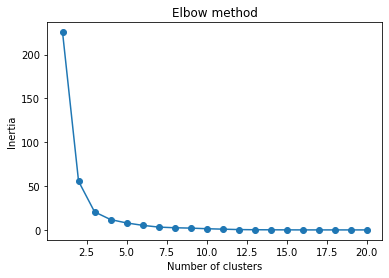

In [35]:
data = list(zip(avg_degree_centralities, avg_network_strengths))
inertias = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()